In [28]:
import pandas as pd
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [30]:

df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [31]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [32]:
df.dropna(inplace=True)


Ordinal encoding

In [33]:
import category_encoders as ce
import pandas as pd
encoder = ce.OrdinalEncoder(cols=['ocean_proximity'])
df_e = encoder.fit_transform(df)
print(df_e.head())



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                1  
1      2401.0      1138.0         8.3014            358500.0                1  
2       496.0       177.0         7.2574            352100.0                1  
3       558.0       219.0         5.6431            341300.0                1  
4       565.0       259.0         3.8462            342200.0                1  


Ordinal correlation Matrix


Correlation Matrix:
                     longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   
ocean_proximity      0.181198 -0.067980           -0.206178     0.015917   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      

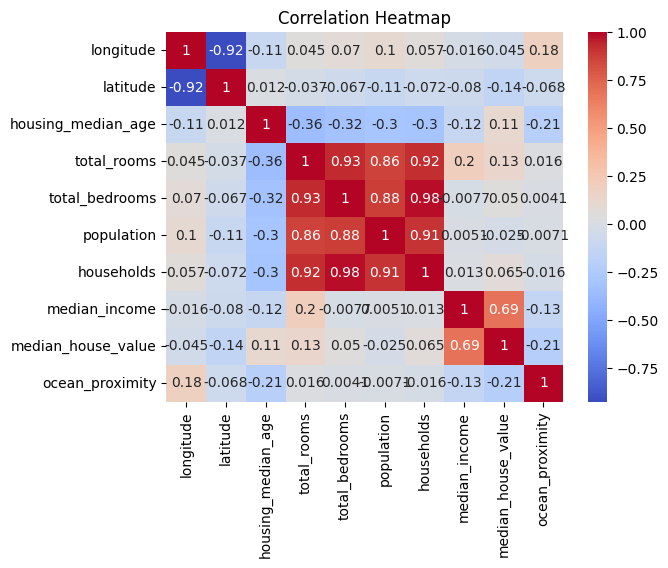

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
print("\nCorrelation Matrix:\n", df_e.corr())
sns.heatmap(df_e.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Ordinal VIF

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset (Assuming your dataframe is named 'df')
X = df_e.drop(columns=['median_house_value'])  # Drop target variable

# Add a constant column for the intercept
X = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the results
print("\nVariance Inflation Factor (VIF):\n", vif_data)



Variance Inflation Factor (VIF):
               Feature           VIF
0               const  17822.506129
1           longitude      9.107858
2            latitude      9.057301
3  housing_median_age      1.293239
4         total_rooms     12.813271
5      total_bedrooms     36.044296
6          population      6.380277
7          households     35.141276
8       median_income      1.761976
9     ocean_proximity      1.158605


One Hot Encode

In [36]:
df_one_hot = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True).astype(int)
print(df_one_hot.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122        37                  41          880             129   
1       -122        37                  21         7099            1106   
2       -122        37                  52         1467             190   
3       -122        37                  52         1274             235   
4       -122        37                  52         1627             280   

   population  households  median_income  median_house_value  \
0         322         126              8              452600   
1        2401        1138              8              358500   
2         496         177              7              352100   
3         558         219              5              341300   
4         565         259              3              342200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1     

One Hot Encode Matrix


Correlation Matrix:
                     longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   
ocean_proximity      0.181198 -0.067980           -0.206178     0.015917   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      

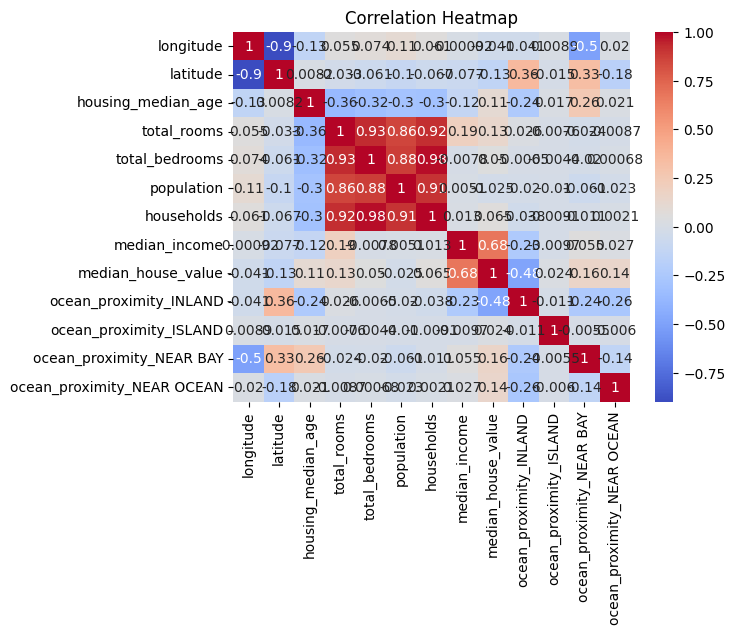

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
print("\nCorrelation Matrix:\n", df_e.corr())
sns.heatmap(df_one_hot.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [38]:
df_one_hot["rooms_per_household"] = df_one_hot["total_rooms"] / df_one_hot["households"]
df_one_hot["bedrooms_per_room"] = df_one_hot["total_bedrooms"] / df_one_hot["total_rooms"]
df_one_hot["population_per_household"] = df_one_hot["population"] / df_one_hot["households"]
df_one_hot.drop(columns=['total_rooms', 'total_bedrooms', 'households'], inplace=True)



In [39]:
df_one_hot.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122,37,41,322,8,452600,0,0,1,0,6.984127,0.146591,2.555556
1,-122,37,21,2401,8,358500,0,0,1,0,6.238137,0.155797,2.109842
2,-122,37,52,496,7,352100,0,0,1,0,8.288136,0.129516,2.802260
3,-122,37,52,558,5,341300,0,0,1,0,5.817352,0.184458,2.547945
4,-122,37,52,565,3,342200,0,0,1,0,6.281853,0.172096,2.181467


One Hot Encode VIF

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_one_hot.drop(columns=['median_house_value'])  # Drop target variable

# Add a constant column for the intercept
X = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the results
print("\nVariance Inflation Factor (VIF):\n", vif_data)



Variance Inflation Factor (VIF):
                        Feature           VIF
0                        const  25188.162213
1                    longitude     12.898331
2                     latitude     13.335413
3           housing_median_age      1.300058
4                   population      1.138540
5                median_income      1.955489
6       ocean_proximity_INLAND      2.416983
7       ocean_proximity_ISLAND      1.001367
8     ocean_proximity_NEAR BAY      1.688108
9   ocean_proximity_NEAR OCEAN      1.273412
10         rooms_per_household      1.304880
11           bedrooms_per_room      1.899974
12    population_per_household      1.009138


One Hot Encode correlation after Feature Engineering


Correlation Matrix:
                             longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.898243           -0.134845   
latitude                    -0.898243  1.000000            0.008187   
housing_median_age          -0.134845  0.008187            1.000000   
population                   0.105877 -0.102647           -0.295787   
median_income               -0.000917 -0.077186           -0.116570   
median_house_value          -0.041079 -0.134841            0.106432   
ocean_proximity_INLAND      -0.041323  0.360703           -0.236968   
ocean_proximity_ISLAND       0.008917 -0.015400            0.017105   
ocean_proximity_NEAR BAY    -0.503332  0.329857            0.256149   
ocean_proximity_NEAR OCEAN   0.020264 -0.175538            0.020797   
rooms_per_household         -0.019727  0.107393           -0.153031   
bedrooms_per_room            0.076752 -0.107369            0.136089   
population_per_household     0.004335  0.003553        

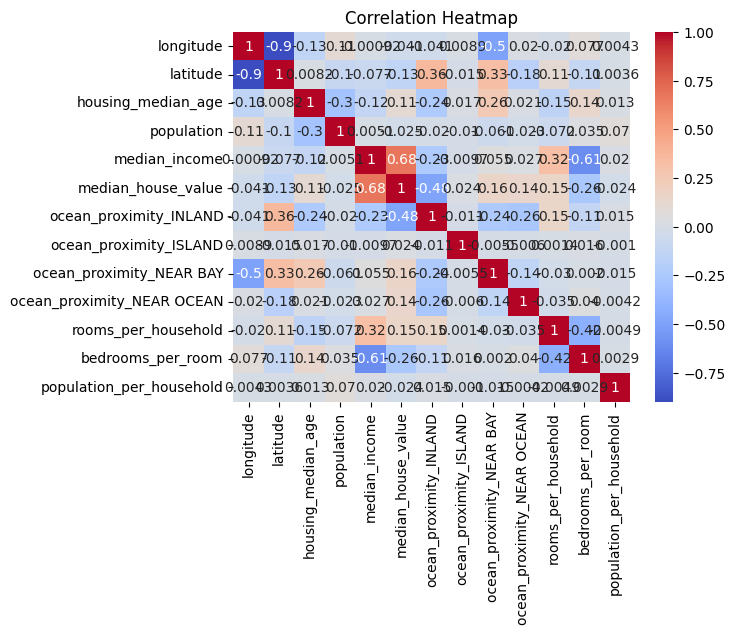

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
print("\nCorrelation Matrix:\n", df_one_hot.corr())
sns.heatmap(df_one_hot.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Scaling

In [42]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df_one_hot), columns=df_one_hot.columns)

print(df_robust.head())  

   longitude  latitude  housing_median_age  population  median_income  \
0  -1.333333      0.75            0.631579   -0.902674            2.5   
1  -1.333333      0.75           -0.421053    1.320856            2.5   
2  -1.333333      0.75            1.210526   -0.716578            2.0   
3  -1.333333      0.75            1.210526   -0.650267            1.0   
4  -1.333333      0.75            1.210526   -0.642781            0.0   

   median_house_value  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0            1.879477                     0.0                     0.0   
1            1.231405                     0.0                     0.0   
2            1.187328                     0.0                     0.0   
3            1.112948                     0.0                     0.0   
4            1.119146                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  rooms_per_household  \
0                       1.0               

Modelling after feature engineering without Scaling

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define Features (X) and Target Variable (y)
X = df_one_hot.drop(columns=['median_house_value'])  
y = df_one_hot['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("✅ Model Trained Successfully!")
print("📉 Mean Absolute Error (MAE):", mae)
print("📊 Root Mean Squared Error (RMSE):", rmse)

✅ Model Trained Successfully!
📉 Mean Absolute Error (MAE): 38610.8894837289
📊 Root Mean Squared Error (RMSE): 57857.98715835355


Modelling after feature engineering with Scaling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define Features (X) and Target Variable (y)
X = df_robust.drop(columns=['median_house_value'])  
y = df_robust['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("✅ Model Trained Successfully!")
print("📉 Mean Absolute Error (MAE):", mae)
print("📊 Root Mean Squared Error (RMSE):", rmse)

✅ Model Trained Successfully!
📉 Mean Absolute Error (MAE): 0.26580790324222275
📊 Root Mean Squared Error (RMSE): 0.3983060353422467


With differnt model

In [46]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("🌳 Decision Tree - MAE:", mae)
print("🌳 Decision Tree - RMSE:", rmse)


🌳 Decision Tree - MAE: 0.34928490085812647
🌳 Decision Tree - RMSE: 0.5285421839755232


Forward selection